In [ ]:
import os
import PIL
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from city_sustainability.quality import life_quality
from city_sustainability.models import unet_model
from city_sustainability.models import unet_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from city_sustainability.preprocessing import image_resize
from city_sustainability.loading_data import loading_paths, image_and_label_arrays

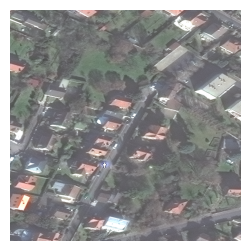

In [72]:
file_path = '../../raw_data/OpenEarthMap_wo_xBD/paris/images/paris_2.tif'
fig = plt.figure(figsize=(3, 3))
image = Image.open(file_path)
plt.axis('off')
plt.imshow(image)
plt.show()
#To get the shape is necessary to convert to numpy and get shape Uncoment following lines
# image = np.array(image)
# image.shape

In [73]:
resize_im = image_resize(256,256,image)
resize_im.size

(256, 256)

In [74]:
resize_imnp = np.array(resize_im)
resize_imnp.shape

(256, 256, 3)

In [77]:
image_ok = np.expand_dims(resize_imnp, axis=0)
image_ok.shape

(1, 256, 256, 3)

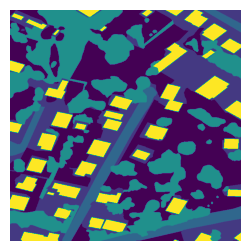

In [112]:
file_path = '../../raw_data/OpenEarthMap_wo_xBD/paris/labels/paris_2.tif'
fig = plt.figure(figsize=(3, 3))
label = Image.open(file_path)
plt.axis('off')
plt.imshow(label)
# plt.show()
# label = np.array(label)
# label.shape

In [91]:
label.size

(650, 650)

In [99]:
path = '/home/marcel/code/Zubairslb/city_sustainability/model_training/marcel/20230525-03-unet_vgg16_0.50img_100epch_32btch_0.31iou_0.59acc/'

model_5 = tf.keras.models.load_model(path, custom_objects={"compute_iou": unet_model.compute_iou})

In [100]:
# Use the loaded model to make a prediction
label_pred = model_5.predict(image_ok)

1/1 [==============================] - 0s 162ms/step


In [92]:
label_pred.shape

(1, 256, 256, 9)

In [95]:
label_prednp = np.argmax(label_pred, axis=-1)

In [96]:
label_prednp.shape

(1, 256, 256)

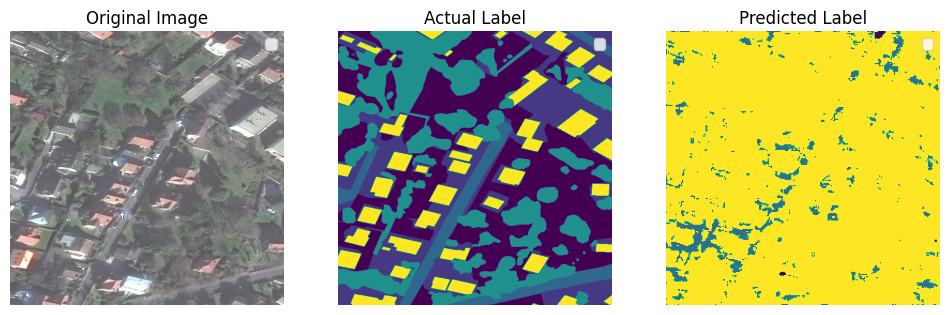

In [116]:
def display_images_side_by_side(image_array1, image_array2, image_array3, legend1, legend2, legend3):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
     
    # Display the first image with legend
    axs[0].imshow(image_array1)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[0].legend([legend1])
    
    # Display the second image with legend
    axs[1].imshow(image_array2)
    axs[1].set_title('Actual Label')
    axs[1].axis('off')
    axs[1].legend([legend2])
    
    # Display the third image with legend
    # Reshape the image_array1 to remove the extra dimension
    image_array3 = np.squeeze(image_array3)
    
    axs[2].imshow(image_array3)
    axs[2].set_title('Predicted Label')
    axs[2].axis('off')
    axs[2].legend([legend3])
    
    plt.show()

# Call the function with the correct arguments
display_images_side_by_side(image, label, label_prednp, 'X_test_scaled', 'y_test_np', 'y_pred_np')